https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house_data = pd.read_csv('datasets/kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1)

house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 2.8+ MB


In [6]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']

house_data.drop('date', inplace=True, axis=1)
house_data = house_data.drop('yr_built', axis=1)

In [7]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)

house_data.drop('yr_renovated', inplace=True, axis=1)

In [11]:
house_data[['renovated', 'house_age']].sample(10)

,renovated,house_age
12264,0,10
11744,0,11
18117,0,16
7296,0,36
6432,0,101
6772,0,65
9147,0,40
7538,0,64
18458,0,87
546,0,23


In [12]:
house_data.to_csv('datasets/house_data_processed.csv', index=False)

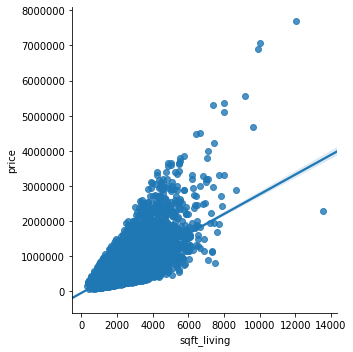

In [28]:
sns.lmplot('sqft_living', 'price', house_data)

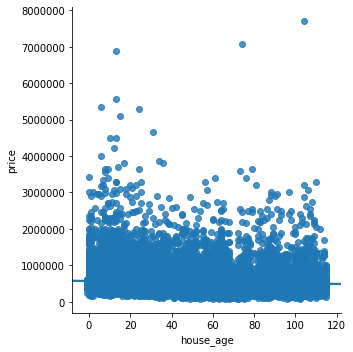

In [30]:
sns.lmplot('house_age', 'price', house_data)

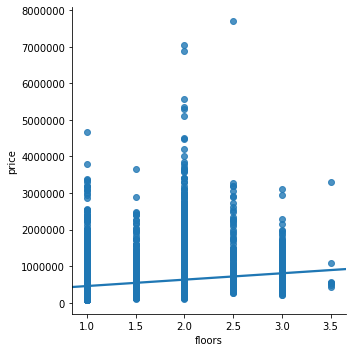

In [31]:
sns.lmplot('floors', 'price', house_data)

### Scaling dataset and one feature for simple linear regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
X = house_data[['sqft_living']]

y = house_data['price']

In [15]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [16]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
linear_regression = LinearRegression()

model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
df = pd.DataFrame({'test': y_test, 'predicted': y_pred})

df.sample(10)

,test,predicted
19721,690000.0,877087.515685
11974,750000.0,524636.850838
19841,272000.0,728842.999402
15002,745000.0,777540.381339
14266,400000.0,511184.535385
14349,517950.0,357828.139230
18814,855000.0,567684.260285
14007,539950.0,761397.602796
1209,392400.0,656469.542269
8509,555000.0,645707.689907


### Regression line

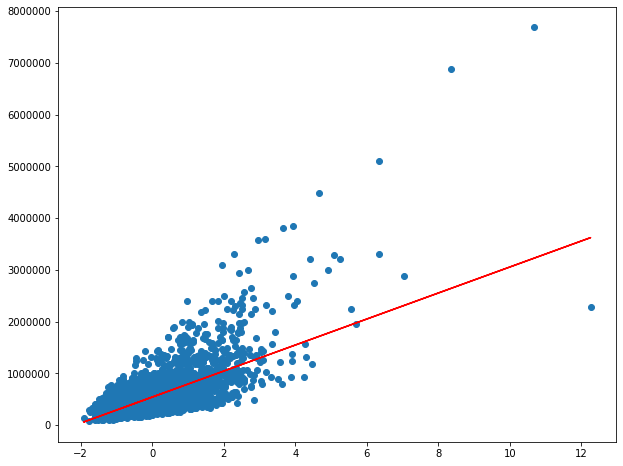

In [40]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show()

In [42]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.4924462623213741


In [43]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.49122960410676864


In [44]:
theta_0 = linear_regression.coef_
theta_0

array([251423.12120782])

In [45]:
intercept = linear_regression.intercept_
intercept

539163.4222093696

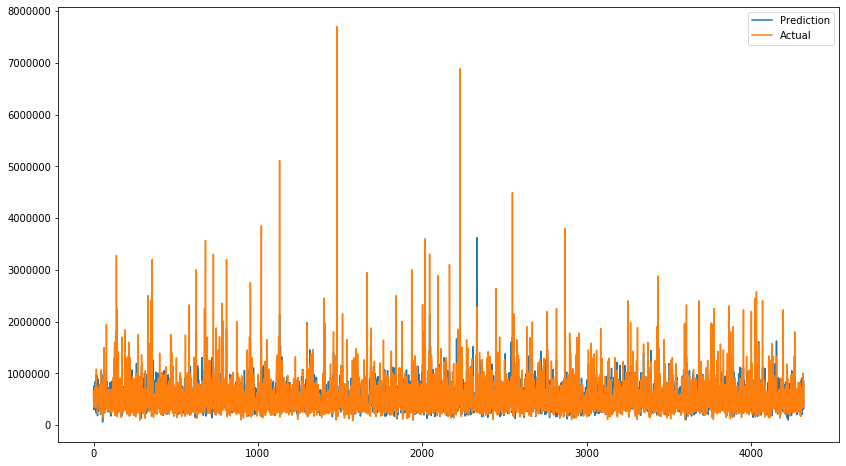

In [47]:
plt.subplots(figsize=(14,8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

In [48]:
import statsmodels.api as sm

### Adding a constant

In [52]:
X_train[:5]

array([[ 1.        ,  1.79484757],
       [ 1.        , -0.79715013],
       [ 1.        ,  1.21520251],
       [ 1.        ,  0.98553183],
       [ 1.        , -0.67684644]])

In [54]:
X_train = sm.add_constant(X_train)

X_train[:5]

array([[ 1.        ,  1.79484757],
       [ 1.        , -0.79715013],
       [ 1.        ,  1.21520251],
       [ 1.        ,  0.98553183],
       [ 1.        , -0.67684644]])

In [56]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:11:32   Log-Likelihood:            -2.3979e+05
No. Observations:               17290   AIC:                         4.796e+05
Df Residuals:                   17288   BIC:                         4.796e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.392e+05   1941.308    277.732      0.0

In [57]:
theta_0, intercept

(array([251423.12120782]), 539163.4222093696)